## QUESTION 1

In [24]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
data = {'orderid':  ['1','2','3','4','5','6','7','8','9','10'],
        'productid': ['01', '02','03','04','05','01','09','10','04','05'],
        'customerid': ['010', '011','012','013','014','010', '011','012','013','014'],
        'timestamp': ['122', '400','460','800','600','122', '400','460','800','600' ],
        'quantity': ['1','2','3','4','5','2','3','5','1','5']
        }
df = pd.DataFrame(data)
df.head(10)

,orderid,productid,customerid,timestamp,quantity
0,1,01,010,122,1
1,2,02,011,400,2
2,3,03,012,460,3
3,4,04,013,800,4
4,5,05,014,600,5
5,6,01,010,122,2
6,7,09,011,400,3
7,8,10,012,460,5
8,9,04,013,800,1
9,10,05,014,600,5


In [25]:
df.shape

(10, 5)

In [26]:
df.columns

Index(['orderid', 'productid', 'customerid', 'timestamp', 'quantity'], dtype='object')

In [27]:
df.info

<bound method DataFrame.info of   orderid productid customerid timestamp quantity
0       1        01        010       122        1
1       2        02        011       400        2
2       3        03        012       460        3
3       4        04        013       800        4
4       5        05        014       600        5
5       6        01        010       122        2
6       7        09        011       400        3
7       8        10        012       460        5
8       9        04        013       800        1
9      10        05        014       600        5>

In [28]:
df.describe

<bound method NDFrame.describe of   orderid productid customerid timestamp quantity
0       1        01        010       122        1
1       2        02        011       400        2
2       3        03        012       460        3
3       4        04        013       800        4
4       5        05        014       600        5
5       6        01        010       122        2
6       7        09        011       400        3
7       8        10        012       460        5
8       9        04        013       800        1
9      10        05        014       600        5>

<BarContainer object of 10 artists>

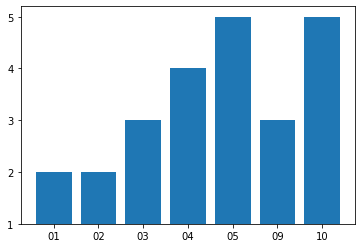

In [37]:
x=df['productid']
y=df['quantity']
plt.bar(x,y)

# Producer Task

In [47]:
from time import sleep
from random import random
from threading import Thread
from queue import Queue
import numpy as np
 

def producer(queue):
    print('Producer: Running')
    # generate items
    for i in range(10000):
        #sleep(1)
        # create a tuple
        order = np.random.binomial(1, 0.2, 10000)
        # add to the queue
        queue.put(order)
        # report progress
        #print(f'>producer added {item}')
    # signal that there are no further items
    queue.put(None)
    print(order.shape) 
    print('Producer: Done')


# Consumer Task

In [39]:
def consumer(queue):
    print('Consumer: Running')
    arr = [0 for i in range(10)]
    # consume items
    while True:
        order = queue.get()
        order = order.reshape(-1, 100)
        for x in range(100):
        	for y in range(100):
            		if (order[x, y] == 1):
                		arr[x]= arr[x]+1
        if order is None:
            break
        #sleep(1)
    # all done
    print('Consumer: Done')
    print(f'Top Selling Items : {arr}')

In [40]:
# create the shared queue
queue = Queue()
# start the consumer
consumer = Thread(target=consumer, args=(queue,))
consumer.start()
# start the producer
producer = Thread(target=producer, args=(queue,))
producer.start()
# wait for all threads to finish
producer.join()
consumer.join()

Exception in thread Thread-5:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\hp\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\hp\AppData\Local\Temp\ipykernel_2864\2611329044.py", line 7, in consumer
AttributeError: 'NoneType' object has no attribute 'reshape'


Consumer: Running
Producer: Running
(1000,)
Producer: Done


## QUESTION 2

In [46]:
!pip install pyspark
import pyspark
from pyspark.sql import SparkSession

  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317161 sha256=1e91f4c7eb7bd393d0406fb839f0f309e68467313ae93cdf720370fa4bbd4bbd
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\9f\34\a4\159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


In [73]:
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName("pyspark_practice").setMaster("local")
sc = SparkContext(conf=conf)
# Create Session
spark = SparkSession\
    .builder
    .appName("MyApp")\
    .config("spark.some.config.option", "config-value")\
    .getOrCreate()

# Read Csv File
df = spark.read.csv("C:\Users\hp\Downloads\iris.csv")

#PreProcessing

df.show()

df.printSchema()

#Defining X and Y
x=df["sepal.length"]
y=df["sepal.width"]

IndentationError: unexpected indent (2710478702.py, line 4)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(y[:1000],x[:1000],test_size=0.2,random_state=51)phir kah 


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf = clf.fit(Xtrain[:1000], Ytrain[:1000])
pred=clf.predict(Xtest[:1000])
print (pred)
clf.score(Xtest[:1000],Ytest[:1000])
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
print ("Accuracy : " , accuracy_score(Ytest[:1000],pred)*100)  
print("Report : \n", classification_report(Ytest[:1000], pred))
print("F1 Score : ",f1_score(Ytest[:1000], pred, average='weighted')*100)
print("Confusion Matrix\n: ",confusion_matrix(Ytest[:1000],pred))

## Decision Tree Classifier

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xtrain[:1000], Ytrain[:1000])
pred=clf.predict(Xtest[:1000])
print (pred)
clf.score(Xtest[:1000],Ytest[:1000])
print ("Accuracy : " , accuracy_score(Ytest[:1000],pred)*100)  
print("Report : \n", classification_report(Ytest[:1000], pred))
print("F1 Score : ",f1_score(Ytest[:1000], pred, average='weighted')*100)
print("Confusion Matrix\n: ",confusion_matrix(Ytest[:1000],pred))

## Support Vector Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
clf3 = BaggingClassifier()
clf3 = clf3.fit(x_train[:1500],y_train[:1500])
pred3=clf3.predict(x_test[:1500])
print (pred3)
clf3.score(x_test,y_test)
print ("Accuracy : " , accuracy_score(y_test[:1500],pred3)*100)  
print("Report : \n", classification_report(y_test[:1500], pred3))
print("F1 Score : ",f1_score(y_test[:1500], pred3, average='weighted')*100)
print("Confusion Matrix\n: ",confusion_matrix(y_test[:1500],pred3))

## QUESTION 3


### Mapper Code

In [ ]:
#!/usr/bin/env python

import sys
import math

centroid1 = [1.667, 2]
centroid2 = [3.57, 3.71]

for line in sys.stdin:

    point = list(map(float, line.strip().split(',')))


    dist_cent1 = math.sqrt((point[0] - centroid1[0]) ** 2 + (point[1] - centroid1[1]) ** 2)
    dist_cent2 = math.sqrt((point[0] - centroid2[0]) ** 2 + (point[1] - centroid2[1]) ** 2)

    
    print(f"{point}\t{dist_cent1},{dist_cent2}")



## Reducer Code

In [ ]:
#!/usr/bin/env python

import sys
import numpy as np

points1 = []
points2 = []
coord1 = np.array([0.0, 0.0])
coord2 = np.array([0.0, 0.0])

for line in sys.stdin:

    point, dists = line.strip().split('\t')
    point = list(map(float, point.strip('[]').split(',')))
    dist1, dist2 = map(float, dists.split(','))


    if dist1 < dist2:
        points1.append(point)
        coord1 += np.array(point)
    else:
        points2.append(point)
        coord2 += np.array(point)


new_centroid1 = coord1 / len(points1)
new_centroid2 = coord2 / len(points2)

print(f"Centroid 1: {new_centroid1}")
print(f"Centroid 2: {new_centroid2}")
for i, point in enumerate(points1):
    print(f"Point P{i}: {point} should be in centroid 1")
for i, point in enumerate(points2):
    print(f"Point P{i}: {point} should be in centroid 2")

## Part 2

In [68]:
class Country:
    def __init__(self, name,capital,provinces):
        self.name=name
        self.capital=capital
        self.provinces=provinces
        
    def printDetails(self):
        print(self.name, self.capital, self.provinces)
class Province(Country):
    def __init__(self, name,capital,provinces,district):
        self.district=district
        
        Country.__init__(self, name,capital,provinces)
    def printDistrict(self):
        print(self.district)

x = Province("Pakistan", "Islamabad","KPK","3")

x.printDetails()
x.printDistrict()

Pakistan Islamabad KPK
3


## QUESTION 4

In [ ]:
#Create DockerFile
cd /bda
 python3 -m venv .venv
 source .venv/bin/activate
 python3 -m pip install Flask
 python3 -m pip freeze > requirements.txt
 touch app.py
#To Start the app
cd /bda
 source .venv/bin/activate
 python3 -m flask run
#Create Dockerfile
mkdir /bda
# syntax=docker/dockerfile:1
FROM python:3.8-slim-buster
#Build the container image.
docker build --ubunutu.
 [internal] load build definition from Dockerfile
 => transferring dockerfile: 203B
 [internal] load .dockerignore
 => transferring context: 2B
 [internal] load metadata for docker.io/library/python:3.8-slim-buster
 [1/6] FROM docker.io/library/python:3.8-slim-buster
 [internal] load build context
 => transferring context: 953B
 CACHED [2/6] WORKDIR /app
 [3/6] COPY requirements.txt requirements.txt
 [4/6] RUN pip3 install -r requirements.txt
 [5/6] COPY . .
 [6/6] CMD ["python3", "-m", "flask", "run", "--host=0.0.0.0"]
 exporting to image
 => exporting layers
 => writing image sha256:8cae92a8fbd6d091ce687b71b31252056944b09760438905b726625831564c4c
 => naming to docker.io/library/ubuntu
#Run Docker  
docker run python-docker

In [70]:
#In app.py
from flask import Flask
app = Flask(__name__)

@app.route('/')
def Random_Array():
    #Code For code.py for Dockerfile
    x = np.random.random(10)
    print("Original array:")
    print(x)
    x.sort()
    print("Sorted array:")
    print(x)
    return x

In [75]:
#CODE
x = np.random.random(10)
print("Original array:")
print(x)
x.sort()
print("Sorted array:")
print(x)

Original array:
[0.21013774 0.71599599 0.42792188 0.5885261  0.61777933 0.55066124
 0.58659631 0.90560002 0.86635194 0.2464309 ]
Sorted array:
[0.21013774 0.2464309  0.42792188 0.55066124 0.58659631 0.5885261
 0.61777933 0.71599599 0.86635194 0.90560002]
